In [47]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import clip

In [48]:
# MNIST fashion 데이터셋
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [59]:
len(dataset)

60000

In [49]:
# 클립 모델을 불러옵니다.
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)


In [65]:
# 입력 이미지 전처리
input_image_path = "./example.jpeg" # 입력 이미지 파일 경로
input_image = Image.open(input_image_path)
input_image = input_image.convert('RGB')
input_tensor = preprocess(input_image).unsqueeze(0).to(device)


In [58]:
# 데이터셋의 모든 이미지에 대해 임베딩을 생성 -> 오래걸림 (M1맥 기준 1시간)
embeddings = []
for image, _ in dataset:
    image = transforms.ToPILImage()(image)  # Tensor -> PIL Image로 변환
    tensor = preprocess(image).unsqueeze(0).to(device)
    with torch.no_grad():
        embedding = model.encode_image(tensor).cpu().numpy()
        embeddings.append(embedding)
embeddings = np.concatenate(embeddings, axis=0)

In [66]:

# 입력 이미지와 데이터셋의 모든 이미지에 대해 유사도를 측정
with torch.no_grad():
    input_embedding = model.encode_image(input_tensor).cpu().numpy()
    similarities = cosine_similarity(input_embedding, embeddings)


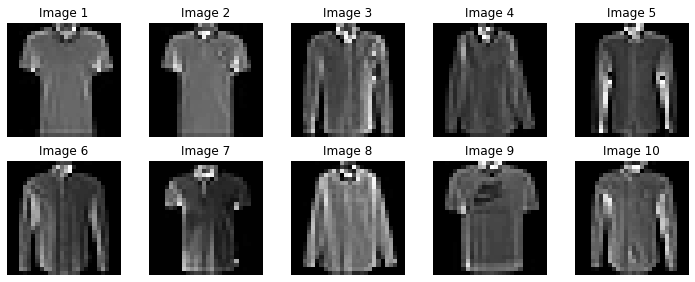

In [74]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
cnt = 0

# 유사도가 가장 높은 상위 10개 이미지를 선택
most_similar_indices = np.argsort(similarities[0])[::-1][:10]
most_similar_images = [dataset[i][0] for i in most_similar_indices]

# 추천된 이미지 출력
for image in most_similar_images:
    image = transforms.ToPILImage()(image)
    # image.show()
    axs[cnt//5, cnt%5].set_title(f"Image {cnt+1}")
    axs[cnt//5, cnt%5].axis('off')
    axs[cnt//5, cnt%5].imshow(image, cmap='gray')
    cnt += 1
# 이미지를 보여줍니다.
plt.tight_layout()
plt.show()

In [78]:
# 입력 이미지 전처리
input_image_path = "./example2.jpeg" # 입력 이미지 파일 경로
input_image = Image.open(input_image_path)
input_image = input_image.convert('RGB')
input_tensor = preprocess(input_image).unsqueeze(0).to(device)


In [81]:

# 입력 이미지와 데이터셋의 모든 이미지에 대해 유사도를 측정
with torch.no_grad():
    input_embedding = model.encode_image(input_tensor).cpu().numpy()
    similarities = cosine_similarity(input_embedding, embeddings)


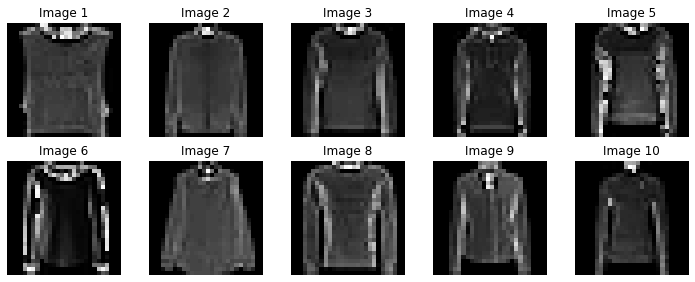

In [82]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

cnt = 0

# 유사도가 가장 높은 상위 10개 이미지를 선택
most_similar_indices = np.argsort(similarities[0])[::-1][:10]
most_similar_images = [dataset[i][0] for i in most_similar_indices]

# 추천된 이미지 출력
for image in most_similar_images:
    image = transforms.ToPILImage()(image)
    # image.show()
    axs[cnt//5, cnt%5].set_title(f"Image {cnt+1}")
    axs[cnt//5, cnt%5].axis('off')
    axs[cnt//5, cnt%5].imshow(image, cmap='gray')
    cnt += 1
# 이미지를 보여줍니다.
plt.tight_layout()
plt.show()

In [83]:
# 입력 이미지 전처리
input_image_path = "./example3.jpeg" # 입력 이미지 파일 경로
input_image = Image.open(input_image_path)
input_image = input_image.convert('RGB')
input_tensor = preprocess(input_image).unsqueeze(0).to(device)


In [84]:

# 입력 이미지와 데이터셋의 모든 이미지에 대해 유사도를 측정
with torch.no_grad():
    input_embedding = model.encode_image(input_tensor).cpu().numpy()
    similarities = cosine_similarity(input_embedding, embeddings)


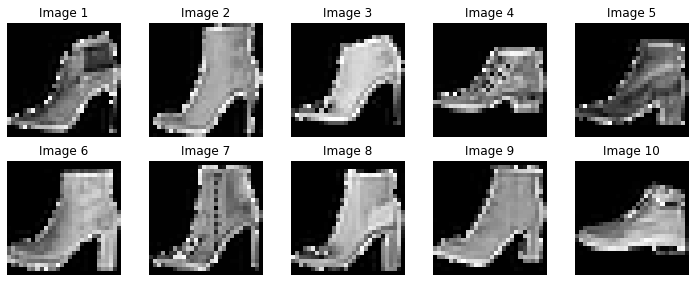

In [86]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

cnt = 0

# 유사도가 가장 높은 상위 10개 이미지를 선택
most_similar_indices = np.argsort(similarities[0])[::-1][:10]
most_similar_images = [dataset[i][0] for i in most_similar_indices]

# 추천된 이미지 출력
for image in most_similar_images:
    image = transforms.ToPILImage()(image)
    # image.show()
    axs[cnt//5, cnt%5].set_title(f"Image {cnt+1}")
    axs[cnt//5, cnt%5].axis('off')
    axs[cnt//5, cnt%5].imshow(image, cmap='gray')
    cnt += 1
# 이미지를 보여줍니다.
plt.tight_layout()
plt.show()